# Zillow Value Additional Calculations

## Goal
**A. Calculate following variables:**  
1. Zillow value adjusted with inflation (CPI)
2. Average of surrounding Zip Codes Zillow Value House Price

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load data
income = pd.read_csv("Income_Home_Prices_ZIP_v3.csv")

In [3]:
# Datafram columns name
income.columns

Index(['ZIP', 'Borough', 'Neighborhood', 'Year',
       'Total Adjusted Gross Income (IRS)', 'Number of Returns (IRS)', 'AGI',
       'AGIadj2015', 'AdjacentIncome', 'Median HH Income ($)',
       'Mean HH Income ($)', 'Median Home Value ($/sq. foot)', '% Employed',
       '% Unemployed', '% Not in Labor Force', 'Bordering Water',
       'Number of Subway Stations in ZIP', 'Stops in ZIP',
       'Number of Subway Lines Serving ZIP', 'Lines Serving ZIP',
       'Number of Parks', 'Number of Playgrounds', 'Park Acreage',
       'LandSqMile', 'Latitude', 'Longitude', 'adjacentZIP', 'Zillow_value',
       'Zillow_value2', 'Proximity', 'Coffees', 'NewCoffees', 'CRIME_COUNT',
       'A1', 'A2', 'DM', 'NB'],
      dtype='object')

In [4]:
# Create Dataframe per year

income2001 = income[income.Year == 2001]
income2002 = income[income.Year == 2002]
income2003 = income[income.Year == 2003]  # note: no data for year 2003
income2004 = income[income.Year == 2004]
income2005 = income[income.Year == 2005]
income2006 = income[income.Year == 2006]
income2007 = income[income.Year == 2007]
income2008 = income[income.Year == 2008]
income2009 = income[income.Year == 2009]
income2010 = income[income.Year == 2010]
income2011 = income[income.Year == 2011]
income2012 = income[income.Year == 2012]
income2013 = income[income.Year == 2013]
income2014 = income[income.Year == 2014]
income2015 = income[income.Year == 2015]

## 1. Inflation Adjusted Zillow Values (2015 dollars)

|Year|	Average |	CPI |  
|----|----------|-------|
|2001|     177.1|	2.8 |
|2002|	179.9|	1.6|  
|2003|	184|	2.3|  
|2004|	188.9|	2.7|  
|2005|	195.3|	3.4|  
|2006|	201.6|	3.2|  
|2007|	207.3|	2.8|  
|2008|	215.303|	3.8|  
|2009|	214.537|	-0.4  
|2010|	218.056|	1.6|  
|2011|	224.939|	3.2|  
|2012|	229.594|	2.1|  
|2013|	232.957|	1.5|  
|2014|	236.736|	1.6|  
|2015|	237.017|	0.1|  
|2016|	240.007|	1.3|  

CPI column: increase % from previous year. Eg: 1.3% increase from 2015 to 2016  

In [5]:
# Inflation measured by CPI
# Link: http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

# CPI from 2002 to 2015
CPI = [0.016, 0.023, 0.027, 0.034, 0.032, 0.028, 0.038, -0.004, 0.016, 0.032, 0.021, 0.015, 0.016, 0.001]
CPI_adj = []

for i in range(len(CPI)):
    product = 1.0
    for x in CPI[i:]:
        product *= (1+x)
    CPI_adj.append(product)
    
    #adj = CPI_adj[i] * (1+CPI[i])
    #CPI_adj.append(adj)
CPI_adj.append(1.0)

In [6]:
print(CPI_adj)

[1.337774159674108, 1.3167068500729404, 1.2871034702570292, 1.2532653069688697, 1.2120554226004543, 1.1744723087213702, 1.1424827905849906, 1.1006577943978713, 1.1050781068251723, 1.0876753019932797, 1.0539489360399996, 1.0322712399999998, 1.017016, 1.001, 1.0]


In [7]:
# Zillow_value = original data (cover from 2001 to 2015 with some missing data)
# Zillow_value2 = adjusted data to estimate missing data. ONLY COVER FROM 2005 TO 2015

# ZillowAdj = Zillow_value in 2015 dollars
# ZillowAdj2 = Zillow_value2 in 2015 dollars

income_dfs = [income2001, income2002, income2003, income2004, income2005, income2006, income2007, income2008,
              income2009, income2010, income2011, income2012, income2013, income2014, income2015]

for i in range(len(income_dfs)):
    income_dfs[i]['ZillowAdj'] = income_dfs[i]['Zillow_value'].values * CPI_adj[i]
    income_dfs[i]['ZillowAdj2'] = income_dfs[i]['Zillow_value2'].values * CPI_adj[i]  # all 0 before 2005

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 2. Neighboring Zip Code House Price Average

In [8]:
for df in income_dfs:
    
    def neighbor_avg(zips):
        zips_list = [int(z) for z in zips.split(",")]
        total = 0
        n = 0
        
        for zz in zips_list:
            try:
                neighbor = df[df.ZIP == zz]['ZillowAdj2'].tolist()[0]
                total += neighbor
                n += 1
                #print(zz)
                #print(total)
                #print(n)
                
            except:
                pass

        avg = round(total/n,2)

        return avg

    # Calculate average of adjacent areas income
    df['AdjacentZillow2'] = df['adjacentZIP'].map(neighbor_avg)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
income2008[['AdjacentZillow2', 'adjacentZIP']].head(1)

,AdjacentZillow2,adjacentZIP
6,0.58,"10018, 10016, 10010, 10011"


In [10]:
income2008[['AdjacentZillow2', 'adjacentZIP', 'ZIP']].head(1)

,AdjacentZillow2,adjacentZIP,ZIP
6,0.58,"10018, 10016, 10010, 10011",10001


In [11]:
# Check results
testzips = [10018, 10016, 10010, 10011]
count = len(testzips)
total = 0

for t in testzips:
    add = income2008[income2008.ZIP == t].ZillowAdj2.tolist()[0]
    print(t,":",add)
    total += add

print("Average of surrounding zip codes income:", total/count)

10018 : 0.712609143864
10016 : 0.269370293195
10010 : 0.549412274891
10011 : 0.78095834301
Average of surrounding zip codes income: 0.57808751374


## Create CSV file with newly calculated features

In [12]:
agg = pd.concat(income_dfs).reset_index(drop=True)

In [13]:
agg.groupby('Year').ZIP.count()

Year
2001    175
2002    175
2004    175
2005    175
2006    175
2007    175
2008    175
2009    175
2010    175
2011    175
2012    175
2013    175
2014    175
2015    175
Name: ZIP, dtype: int64

In [14]:
agg.to_csv("Data_with_calc_features.csv", index=False)

# Scatter plots - House Value

In [20]:
agg.columns

Index(['ZIP', 'Borough', 'Neighborhood', 'Year',
       'Total Adjusted Gross Income (IRS)', 'Number of Returns (IRS)', 'AGI',
       'AGIadj2015', 'AdjacentIncome', 'Median HH Income ($)',
       'Mean HH Income ($)', 'Median Home Value ($/sq. foot)', '% Employed',
       '% Unemployed', '% Not in Labor Force', 'Bordering Water',
       'Number of Subway Stations in ZIP', 'Stops in ZIP',
       'Number of Subway Lines Serving ZIP', 'Lines Serving ZIP',
       'Number of Parks', 'Number of Playgrounds', 'Park Acreage',
       'LandSqMile', 'Latitude', 'Longitude', 'adjacentZIP', 'Zillow_value',
       'Zillow_value2', 'Proximity', 'Coffees', 'NewCoffees', 'CRIME_COUNT',
       'A1', 'A2', 'DM', 'NB', 'ZillowAdj', 'ZillowAdj2', 'AdjacentZillow2'],
      dtype='object')

In [25]:
agg2 = agg[agg.Year >= 2005]

In [26]:
# Y axis variable
MeanValue = agg2.ZillowAdj2

X axis variable

Water nearby  
Number of subway lines  
Number of playgrounds  
Number of parks (or acreage?)  
Number of home searches (Google)  
Number of coffee shops (or new only?)  
Number of permits:  
>NB New building  
>A1 Change in certificate of occupancies (commercial to residential)  
>A2 Major modifications (structural changes)   
>DM Demolition    

Violent crime rate    
Proximity to high income area    
Surrounding average income  
Surrounding average house price    

In [38]:
# X variable
X_list = ['AdjacentZillow2','Number of Parks', 'Number of Playgrounds',
           'Number of Subway Lines Serving ZIP',
           'Park Acreage', 'Proximity', 'CRIME_COUNT','A1', 'A2', 'DM', 'NB' ]

In [29]:
print(max(agg2[X_list[0]]))
print(max(MeanValue))

0.89
0.961653349


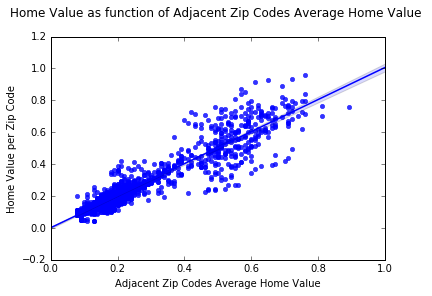

In [30]:
# 1. Adjacent zip code average home value

g1 = sns.regplot(agg2[X_list[0]], MeanValue)
g1.set(title="Home Value as function of Adjacent Zip Codes Average Home Value \n",
       xlabel='Adjacent Zip Codes Average Home Value', ylabel='Home Value per Zip Code')
plt.show()


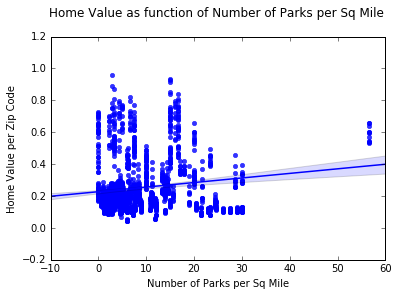

In [33]:
# 2. Number of parks

g2 = sns.regplot(agg2[X_list[1]]/agg2['LandSqMile'], MeanValue)
g2.set(title="Home Value as function of Number of Parks per Sq Mile \n",
       xlabel='Number of Parks per Sq Mile', ylabel='Home Value per Zip Code')
plt.show()


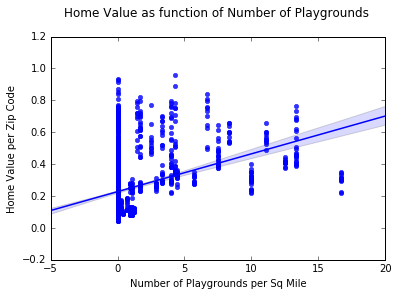

In [34]:
# 3. Number of playgrounds

g3 = sns.regplot(agg2[X_list[2]]/agg2['LandSqMile'], MeanValue)
g3.set(title="Home Value as function of Number of Playgrounds \n",
       xlabel='Number of Playgrounds per Sq Mile', ylabel='Home Value per Zip Code')
plt.show()


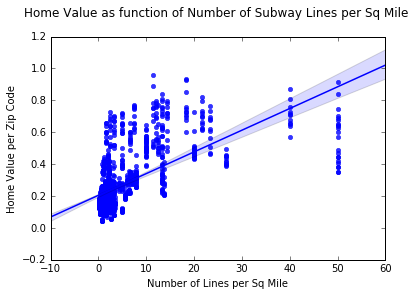

In [35]:
# 4. Number of subways Lines

g4 = sns.regplot(agg2[X_list[3]]/agg2['LandSqMile'], MeanValue)
g4.set(title="Home Value as function of Number of Subway Lines per Sq Mile \n",
       xlabel='Number of Lines per Sq Mile', ylabel='Home Value per Zip Code')
plt.show()

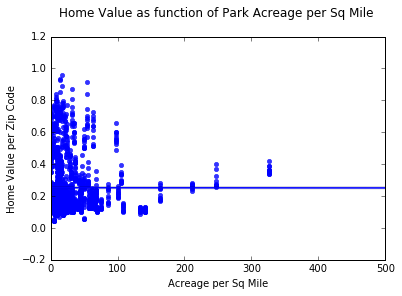

In [36]:
# 5. Park Acreage (use number of parks instead of this one...)

g5 = sns.regplot(agg2[X_list[4]]/agg2['LandSqMile'], MeanValue)
g5.set(title="Home Value as function of Park Acreage per Sq Mile \n",
       xlabel='Acreage per Sq Mile', ylabel='Home Value per Zip Code')
plt.xlim([0,500])  # to exclude one zip code with ~ 171,600 acres!
plt.show()


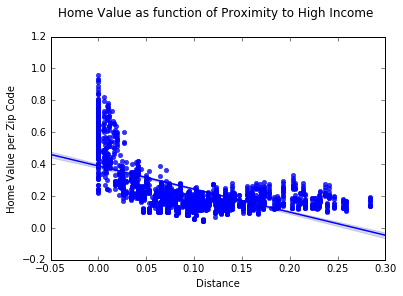

In [39]:
# 6. Proximity to 90th percentile income zip code area

g6 = sns.regplot(agg2[X_list[5]], MeanValue)
g6.set(title="Home Value as function of Proximity to High Income \n",
       xlabel='Distance', ylabel='Home Value per Zip Code')
plt.show()


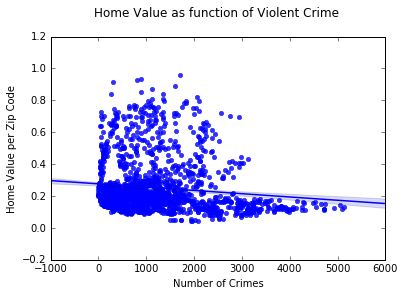

In [40]:
# 7. Crime count

g7 = sns.regplot(agg2[X_list[6]], MeanValue)
g7.set(title="Home Value as function of Violent Crime \n",
       xlabel='Number of Crimes', ylabel='Home Value per Zip Code')
plt.show()

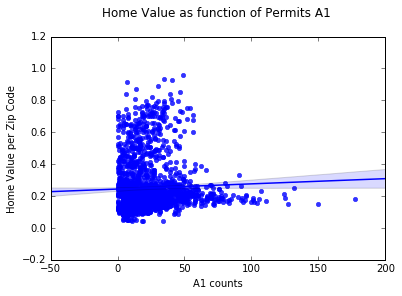

In [41]:
# 8. Permits - A1

g8 = sns.regplot(agg2[X_list[7]], MeanValue)
g8.set(title="Home Value as function of Permits A1 \n",
       xlabel='A1 counts', ylabel='Home Value per Zip Code')
plt.show()

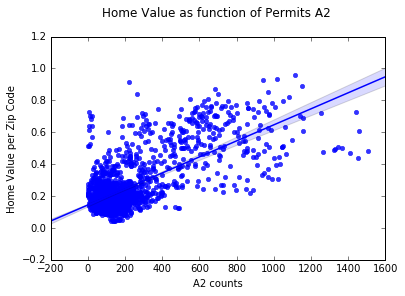

In [42]:
# 9. Permits - A2

g9 = sns.regplot(agg2[X_list[8]], MeanValue)
g9.set(title="Home Value as function of Permits A2 \n",
       xlabel='A2 counts', ylabel='Home Value per Zip Code')
plt.show()

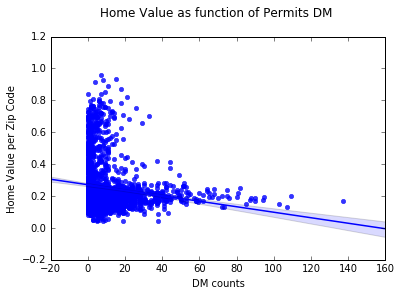

In [43]:
# 10. Permits - DM

g10 = sns.regplot(agg2[X_list[9]], MeanValue)
g10.set(title="Home Value as function of Permits DM \n",
       xlabel='DM counts', ylabel='Home Value per Zip Code')
plt.show()

##### Try with lags of different years

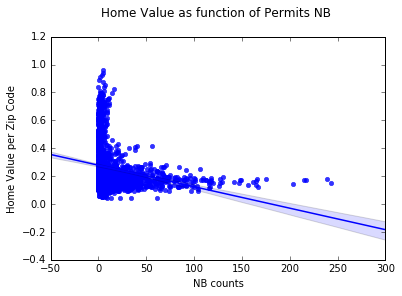

In [44]:
# 11. Permits - NB

g11 = sns.regplot(agg2[X_list[10]], MeanValue)
g11.set(title="Home Value as function of Permits NB \n",
       xlabel='NB counts', ylabel='Home Value per Zip Code')
plt.show()

## Histogram of House Values

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


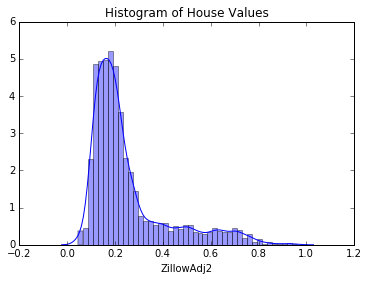

In [16]:
sns.distplot(agg[agg.Year >= 2005]['ZillowAdj2'])
#plt.xlim([0,1000000])
plt.title("Histogram of House Values")

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


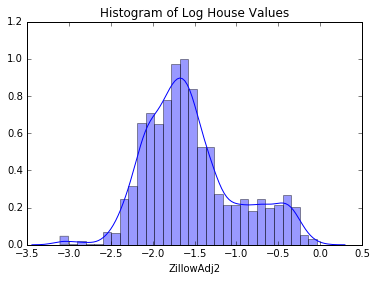

In [17]:
sns.distplot(np.log(agg[agg.Year >= 2005]['ZillowAdj2']))
#plt.xlim([0,1000000])
plt.title("Histogram of Log House Values")

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


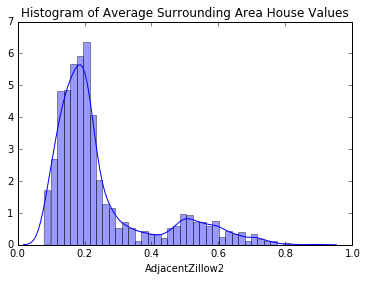

In [18]:
sns.distplot(agg[agg.Year >= 2005]['AdjacentZillow2'])
plt.title("Histogram of Average Surrounding Area House Values")

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


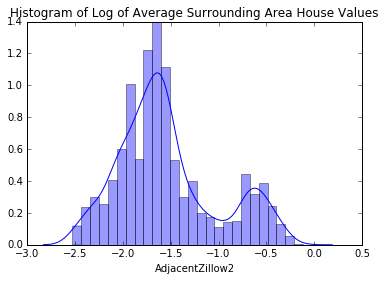

In [19]:
sns.distplot(np.log(agg[agg.Year >= 2005]['AdjacentZillow2']))
plt.title("Histogram of Log of Average Surrounding Area House Values")